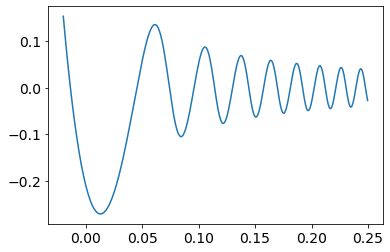

In [39]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import curve_fit
from numpy import linspace
from scipy.special import fresnel


lambda_=0.00858 #(m) wavelength

y_measure=linspace(-0.035,0.35,400) #for straight edge diffraction
y2_measure=linspace(-0.15,0.15,400)  #for cornu spiral


z_=0.69

z=0.32



Y=(y_measure*z_)/(z_+z)
Y2=(y2_measure*z_)/(z_+z)

V=Y*np.sqrt((2*(z_+z))/(lambda_*z_*z))
V2=Y2*np.sqrt((2*(z_+z))/(lambda_*z_*z))

S, C = fresnel(-V) #fresnel integrals

S2,C2=fresnel(-V2)

def straightedgephase(A):
    return np.angle(((A/4)*(((1/2)*(1+1j)-C-1j*S))))  #theoretical straight edge phase 

plt.plot(linspace(-0.035,0.35,400)[30:300],((((straightedgephase(1))))-np.pi/4)[30:300])


In [42]:
z=0.21
z_=0.79

lambda_=0.0086


yn_measure=linspace(-0.25,0.25,1000)

Yn=(yn_measure*z_)/(z_+z)

b=0.1



deltaV=b*np.sqrt((2*(z_+z))/(lambda_*z_*z))

V0=Yn*np.sqrt((2*(z_+z))/(lambda_*z_*z))

S3, C3=fresnel((V0+deltaV/2))
S4, C4=fresnel((V0-deltaV/2))


def slitphase(A):
    return np.angle((A/2)*(C3+1j*S3-C4-1j*S4)) #theoretical slit phase

#plt.plot(yn_measure[5000],slitphase(1)[5000],"r.")
np.where(yn_measure==0)

(array([], dtype=int64),)

In [3]:
#edge30_5_69_2_foam2.pkl
#noedge30_5_69_2_foam2.pkl
import pickle
with open('edge3070_foam2_avg.pkl', 'rb') as f: #import edge data
    edge = pickle.load(f)

In [4]:
import scipy.optimize
from scipy.optimize import curve_fit


def sinsignalfunc(t,A,f,psi):
    return A*np.sin(2*np.pi*f*t+psi)

In [5]:
from scipy.signal import find_peaks

In [6]:
edge_phase=[]
phase_count=0
edge_phasecov=[]
for i in range(400):
    
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),edge["channelB"][i],p0=[2,40000,1])
    edge_phase.append(popt[2])
    edge_phasecov.append(pcov)
peaksa, _ = find_peaks((np.asarray(edge_phase)),height=1)
    
new_edgephase=np.zeros(400)
new_edgephase[0:100]=edge_phase[0:100]
#for i in range(400):
    #if i <399:
        
        #if noedge_phase[i+1]<(noedge_phase[i]):
            #phase_count+=2*np.pi
        #new_noedgephase[i+1]=noedge_phase[i+1]+phase_count
for i in range(100,400):
    if i <399:
        for j in range(len(peaksa)):
            if i == peaksa[j]:
                phase_count+=np.pi
            new_edgephase[i+1]=(edge_phase[i]-phase_count)
        #print(phase_count)

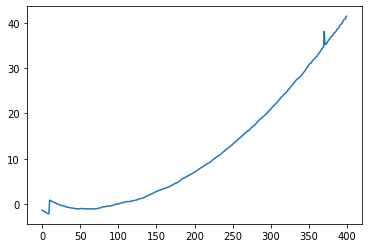

In [7]:
plt.plot(-new_edgephase)

In [1174]:
error=[]

for i in range(400):
    perr = np.sqrt((np.diag(edge_phasecov[i]))[2])
    error.append(perr)


In [11]:
def parabola(x, a, b, c):
     return a*x**2 + b*x + c
    
popt1, pcov1= scipy.optimize.curve_fit(parabola,linspace(-0.035,0.35,400),(-((np.asarray(new_edgephase)))*(180/np.pi))[0:400],p0=[20000,1,1])

Text(0, 0.5, 'Phase ($\\degree$)')

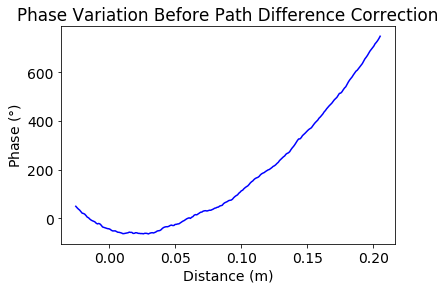

In [16]:
#plt.plot(linspace(-0.035,0.35,400),parabola(linspace(-0.035,0.35,400),popt1[0],popt1[1],popt1[2]))
plt.plot(linspace(-0.035,0.35,400)[10:250],(-((np.asarray(new_edgephase)))*(180/np.pi))[10:250],"b-",label="Edge")
plt.title("Phase Variation Before Path Difference Correction")
plt.xlabel("Distance (m)")
plt.ylabel("Phase ($\\degree$)")

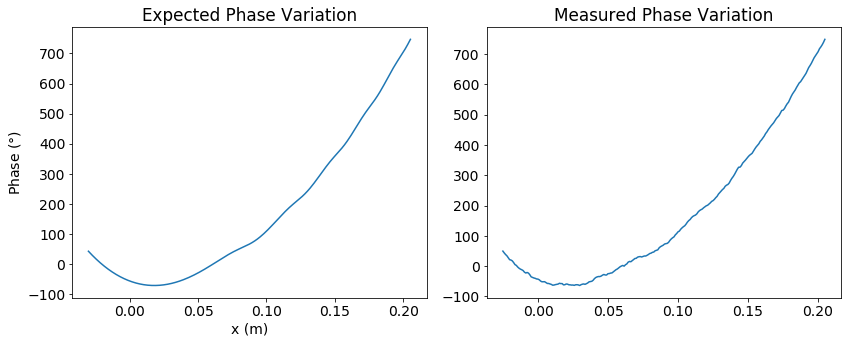

In [23]:

#plt.plot(linspace(-0.035,0.35,400)[10:250],(-((np.asarray(new_edgephase)))*(180/np.pi))[10:250],"b-",label="Edge")


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12, 5))
ax1.set_title('Expected Phase Variation')
ax2.set_title('Strip Diffraction z=0.32m')
ax1.plot(linspace(-0.035,0.35,400)[5:250],(((((straightedgephase(1))))-np.pi/4)*(180/np.pi)+parabola(linspace(-0.035,0.35,400),popt1[0],popt1[1],popt1[2]))[5:250]); ax1.set_xlabel('x (m)'); ax1.set_ylabel('Phase ($\\degree$)')

ax2.plot(linspace(-0.035,0.35,400)[10:250],(-((np.asarray(new_edgephase)))*(180/np.pi))[10:250])
ax2.set_title('Measured Phase Variation')

plt.tight_layout()





Text(0.5, 1.0, 'Straight Edge Diffraction Phase')

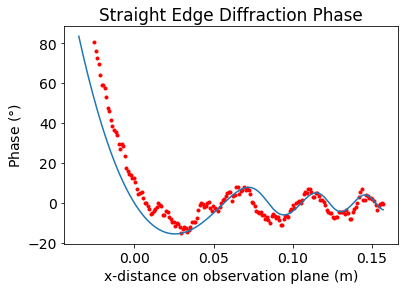

In [34]:
plt.rcParams['font.size'] = 14

plt.plot(linspace(-0.035,0.35,400)[10:200],((newphase-np.pi/4)*(180/np.pi))[10:200],"r.")
plt.plot(linspace(-0.035,0.35,400)[0:200],(((((straightedgephase(1))))-np.pi/4)*(180/np.pi))[0:200])
plt.xlabel("x-distance on observation plane (m)")
plt.ylabel("Phase ($\\degree$)")
plt.title("Straight Edge Diffraction Phase")

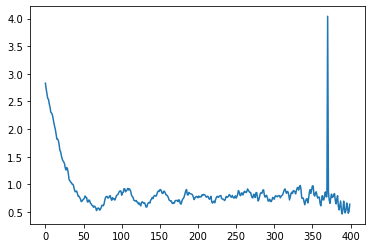

In [624]:
plt.plot(newphase)

In [24]:
phaseexp=(((-((np.asarray(new_edgephase)))*(180/np.pi))-parabola(linspace(-0.035,0.35,400),popt1[0],popt1[1],popt1[2])))


In [12]:
np.savetxt("phase_corrected.txt", phaseexp)

In [13]:
phasenew=np.genfromtxt("phase_corrected.txt")

In [26]:
amplitudes=np.genfromtxt("amplitude_corrected.txt")

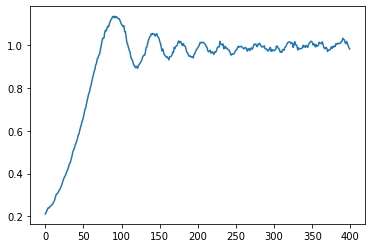

In [321]:
plt.plot(amplitudes)

(-0.8613042599377715,
 0.8580390162714919,
 -0.7857306373739937,
 0.7934240243217334)

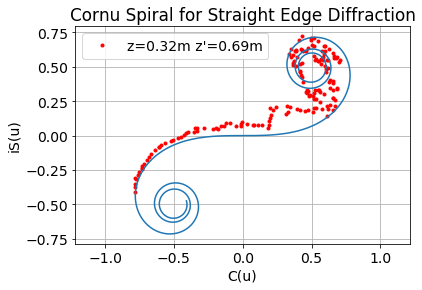

In [41]:
newphase=np.zeros(400)
newphase[10:400]=(phaseexp*(np.pi/180)+np.pi/4)[10:400]
newphase[0:10]=(phaseexp*(np.pi/180)+np.pi/4)[0:10]+np.pi

plt.plot(((((amplitudes)/0.71)*np.cos(newphase))[0:160])-0.5,(((amplitudes/0.71)*np.sin(newphase))[0:160])-0.5,"r.",label="z=0.32m z'=0.69m")
plt.plot(C2,S2)
plt.title("Cornu Spiral for Straight Edge Diffraction")
plt.xlabel("C(u)")
plt.ylabel("iS(u)")
plt.xlim(-1,1)
plt.legend()
plt.grid(True)
plt.axis("equal")

In [16]:
with open('edge_errors_30692.pkl', 'rb') as f:
    newedge = pickle.load(f)

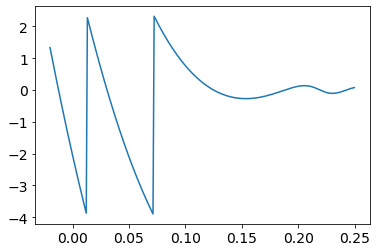

In [1137]:
y2_measure=linspace(-0.15,0.15,350)


z_2=0.7

z2=0.3



Y2=(y2_measure*z_2)/(z_2+z2)

V2=Y2*np.sqrt((2*(z_2+z2))/(lambda_*z_2*z2))

S2, C2 = fresnel(-V2)

def straightedgephase2(A):
    return np.angle(((A/4)*(((1/2)*(1+1j)-C2-1j*S2))))

def straight_edge2(A):
    return (A/4)*np.abs(1+1j)**2*np.abs((1/2)*(1+1j)-C2-1j*S2)**2

plt.plot(linspace(-0.05,0.3,350)[30:300],((((straightedgephase2(1))))-np.pi/4)[30:300])


In [ ]:
A=(straight_edge2(1)/np.max(straight_edge2(1))

plt.plot(A*np.cos())

In [610]:
y3_measure=linspace(-0.15,0.15,500)


z_2=0.678

z2=0.3225



Y3=(y3_measure*z_2)/(z_2+z2)

V3=Y3*np.sqrt((2*(z_2+z2))/(lambda_*z_2*z2))

S3, C3 = fresnel(-V3)

def straightedgephase3(A):
    return np.angle(((A/2)*(((1/2)*(1+1j)-C3-1j*S3))))

def straight_edge3(A):
    return (A/4)*(np.abs(1+1j))**2*(np.abs((1/2)*(1+1j)-C3-1j*S3))**2








theoryphase=(straightedgephase3(2))
theoryamplitude=(straight_edge3(2))

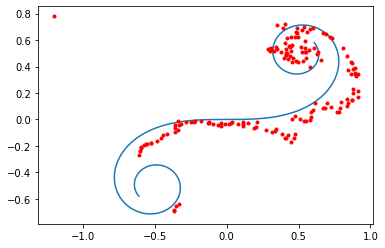

In [309]:
plt.plot(C3,S3)
plt.plot((((amplitudes2/2)*np.cos(phaseexp2*(np.pi/180)+np.pi/4))[0:160])-0.5,(((amplitudes2/2)*np.sin(phaseexp2*(np.pi/180)+np.pi/4))[0:160])-0.5,"r.")


In [114]:
edge_phase2=[]
phase_count=0
for i in range(350):
    
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),newedge["channelB"][i],p0=[2,40000,2])
    edge_phase2.append(popt[2])

peaks2, _ = find_peaks((np.asarray(edge_phase2)),height=2.5)
    
new_edgephase2=np.zeros(350)
new_edgephase2[0:150]=edge_phase2[0:150]

for i in range(150,350):
    if i <349:
        for j in range(len(peaks2)):
            if i == peaks2[j]:
                phase_count+=np.pi
            new_edgephase2[i+1]=(edge_phase2[i]-phase_count)
        #print(phase_count)

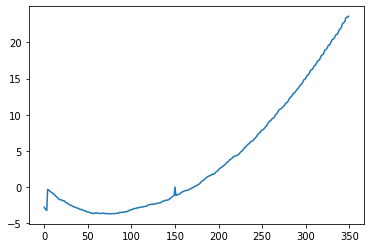

In [115]:
plt.plot(-new_edgephase2)

In [116]:
popt2, pcov2= scipy.optimize.curve_fit(parabola,linspace(-0.05,0.3,350),(-((np.asarray(new_edgephase2)))*(180/np.pi)),p0=[20000,1,1])

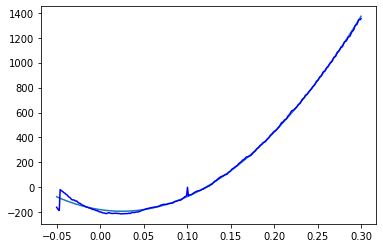

In [117]:
plt.plot(linspace(-0.05,0.3,350),parabola(linspace(-0.05,0.3,350),popt2[0],popt2[1],popt2[2]))
plt.plot(linspace(-0.05,0.3,350),(-((np.asarray(new_edgephase2)))*(180/np.pi)),"b-",label="Edge")

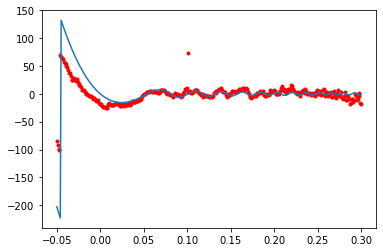

In [139]:
plt.plot(y2_measure,((-((np.asarray(new_edgephase2)))*(180/np.pi))-parabola(y2_measure,popt2[0],popt2[1],popt2[2])),"r.")
plt.plot(y2_measure,(((((straightedgephase2(1))))-np.pi/4)*(180/np.pi)))
phaseexp2=((-((np.asarray(new_edgephase2)))*(180/np.pi))-parabola(y2_measure,popt2[0],popt2[1],popt2[2]))
edgephase=-np.asarray(edge_phase2)

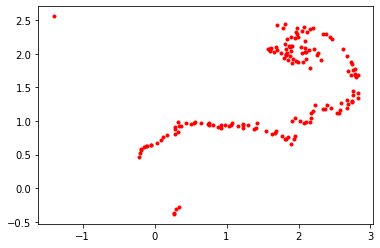

In [509]:
plt.plot((((amplitudes2)*np.cos(phaseexp2*(np.pi/180)+np.pi/4))[0:160]),((amplitudes2*np.sin(phaseexp2*(np.pi/180)+np.pi/4))[0:160]),"r.")

edgephase2=phaseexp2*(np.pi/180)


np.savetxt("phase2.txt", edgephase2)
np.savetxt("amplitudes2.txt",amplitudes2 )

In [119]:
with open('slit1_79_20.pkl', 'rb') as f:
    slit1 = pickle.load(f)


In [ ]:
#attempts at strip and slit phase, requires more analysis

In [1047]:
with open('slit_71_30.pkl', 'rb') as f:
    slit2 = pickle.load(f)


slit2amplitudes=[]
slit2covariance=[]

for i in range(500):
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),slit2["channelB"][i],p0=[1,40000,1])
    
    slit2amplitudes.append(popt[0])
    slit2covariance.append(np.sqrt(pcov[0][0]))
    
#plt.plot(np.arange(-25,25,0.1),((np.asarray(slit2amplitudes)))**2/np.max(((np.asarray(slit2amplitudes)))**2),"r-")
#plt.plot(slit2["channelB"][200])

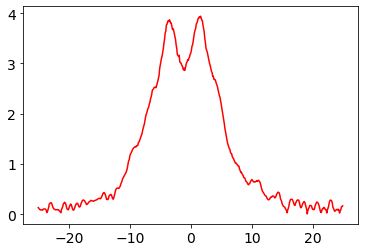

In [1049]:
plt.plot(np.arange(-25,25,0.1),np.abs(np.asarray(slit2amplitudes)),"r-")

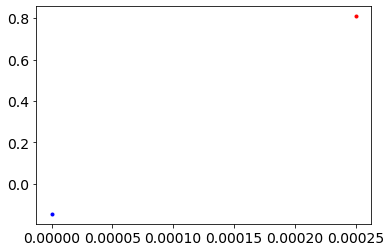

In [1061]:
slit2_phase=[]
phase_count=0
for i in range(500):
    
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),slit2["channelB"][i],p0=[2,40000,0])
    #f popt[0]<0:
        #opt[2]+=np.pi
    slit2_phase.append(popt[2])
plt.plot(np.arange(-0.25,0.25,0.001)[250],((-np.asarray(slit2_phase)))[250],"b.")
plt.plot(yn_measure[500],(slitphase(1))[500],"r.")


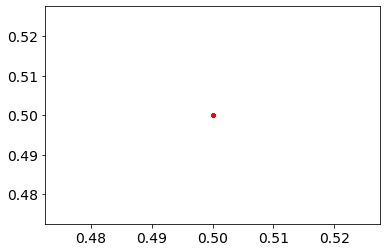

In [1143]:
def slit22(A):
    return (A/2)*np.abs(C3+1j*S3-C4-1j*S4)
#plt.plot(linspace(-0.25,0.25,1000),(np.abs(slit2(1)))/(np.max(np.abs(slit2(1)))))
#plt.plot((slit2(1))*np.cos(slitphase(1)),(slit2(1))*np.sin(slitphase(1)),"b.")
plt.plot(((strip(1))*np.cos(stripphase(1)))+(slit22(1))*np.cos(slitphase(1)),(strip(1))*np.sin(stripphase(1))+(slit22(1))*np.sin(slitphase(1)),"r.")


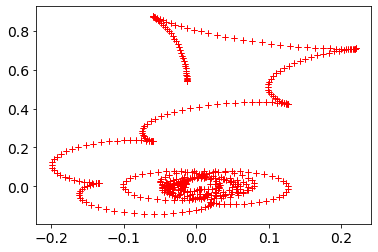

In [906]:
plt.plot((slit22(1))*np.cos(slitphase(1)+np.pi/4),(slit22(1))*np.sin(slitphase(1)+np.pi/4),"r+")

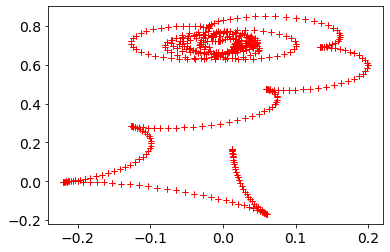

In [907]:
plt.plot((strip(1))*np.cos(stripphase(1)+np.pi/4),(strip(1))*np.sin(stripphase(1)+np.pi/4),"r+")

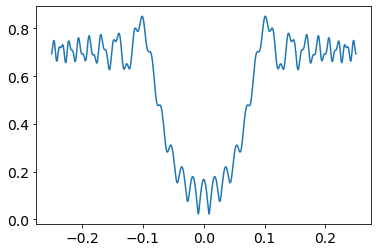

In [43]:
def strip(A):
    return np.abs((A/2)*((1-C3+C4)+1j*(1-S3+S4)))
def stripphase(A):
    return np.angle((A/2)*((1-C3+C4)+1j*(1-S3+S4)))
#plt.plot(yn_measure,stripphase(1))
#plt.plot(yn_measure,strip(1))
plt.plot(yn_measure,strip(1))


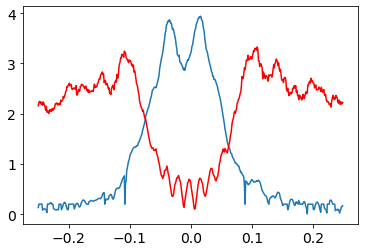

In [790]:
plt.plot(np.arange(-0.25,0.25,0.001),np.abs(slit2amplitudes))
plt.plot(np.arange(-0.25,0.25,0.001),(np.abs(np.asarray(strip1amplitudes))),"r-")



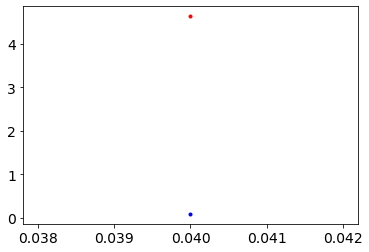

In [1108]:
plt.plot(np.arange(-0.25,0.25,0.001)[290],-newstrip_phase2[290],"r.")

plt.plot(np.arange(-0.25,0.25,0.001)[290],(-np.asarray(slit2_phase))[290],"b.")


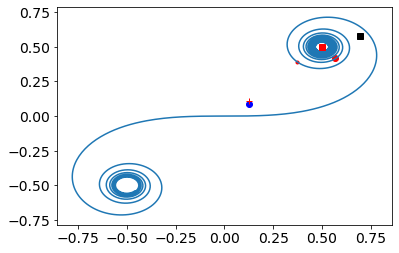

In [1155]:
plt.plot((((np.abs(np.asarray(strip1amplitudes)))/4)*np.cos(-(newstrip_phase2)+np.pi/4))[250],(((np.abs(np.asarray(strip1amplitudes)))/4)*np.sin(-(newstrip_phase2)+np.pi/4))[250],"bo")
#plt.plot((strip(1))*np.cos(stripphase(1)+np.pi/4),(strip(1))*np.sin(stripphase(1)+np.pi/4),"r+")
plt.plot((((np.asarray(slit22(1)))*np.cos(slitphase(1))))[500],((np.asarray(slit22(1)))*np.sin(slitphase(1)))[500],"r.")
plt.plot(((strip(1))*np.cos(stripphase(1)))[500],((strip(1))*np.sin(stripphase(1)))[500],"r+")
plt.plot(((np.abs(np.asarray(slit2amplitudes)/4.525)*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[250],((np.abs(np.asarray(slit2amplitudes)/4.525))*np.sin(-np.asarray(slit2_phase)+np.pi/4))[250],"ro")
plt.plot(C3,S3)
plt.plot(((np.abs(np.asarray(slit2amplitudes)/4.525)*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[250]+((np.abs(np.asarray(strip1amplitudes)/4))*np.cos(-(newstrip_phase2)+np.pi/4))[250],(np.abs(np.asarray(slit2amplitudes)/4.525)*np.sin(-np.asarray(slit2_phase)+np.pi/4))[290]+(((np.abs(np.asarray(strip1amplitudes)/4)))*np.sin((newstrip_phase2)+np.pi/4))[250],"ks")
#plt.plot(((np.abs(np.asarray(slit2amplitudes)/4.5)*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[250]+((np.abs(np.asarray(strip1amplitudes)/4))*np.cos(-(newstrip_phase2)+np.pi/4))[250],(np.abs(np.asarray(slit2amplitudes)/4.5)*np.sin(-np.asarray(slit2_phase)+np.pi/4))[250]+(((np.abs(np.asarray(strip1amplitudes)/4)))*np.sin((newstrip_phase2)+np.pi/4))[250],"ks")

plt.plot((((np.asarray(slit22(1)))*np.cos(slitphase(1))))[500]+((strip(1))*np.cos(stripphase(1)))[500],((np.asarray(slit22(1)))*np.sin(slitphase(1)))[500]+((strip(1))*np.sin(stripphase(1)))[500],"rs")


In [1154]:
(np.abs(np.asarray(strip1amplitudes)))[250]

0.6181702547572813

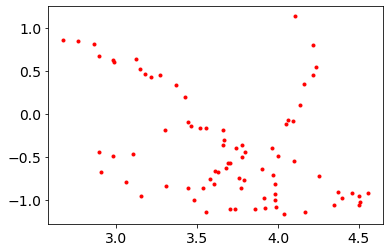

In [1147]:
plt.plot(((np.abs(np.asarray(slit2amplitudes))*np.cos(-np.asarray(slit2_phase))))[210:290]+((np.abs(np.asarray(strip1amplitudes)))*np.cos(-(newstrip_phase2)))[210:290],(np.abs(np.asarray(slit2amplitudes))*np.sin(-np.asarray(slit2_phase)))[210:290]+(((np.abs(np.asarray(strip1amplitudes))))*np.sin((newstrip_phase2)))[210:290],"r.")


In [1097]:
#plt.plot(((strip(1))*np.cos(stripphase(1))+np.pi/4)+(slit22(1))*np.cos(slitphase(1)+np.pi/4),(strip(1))*np.sin(stripphase(1)+np.pi/4)+(slit22(1))*np.sin(slitphase(1)+np.pi/4),"r.")

np.max(np.abs(np.asarray(slit2amplitudes)))

3.9391646554946003

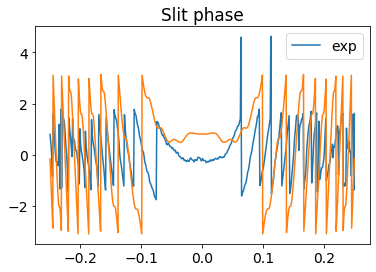

In [1186]:
plt.plot(linspace(-0.25,0.25,500),-np.asarray(slit2_phase),label="exp")
plt.plot(linspace(-0.25,0.25,1000),(slitphase(1)))
plt.title("Slit phase")
plt.legend()

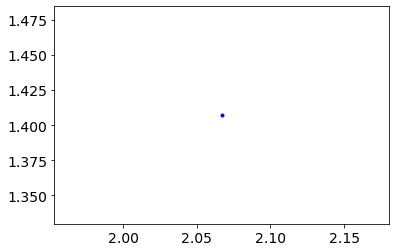

In [954]:
plt.plot((((np.asarray(slit2amplitudes))*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[250]+(((np.asarray(strip1amplitudes)))*np.cos(-(newstrip_phase2)+np.pi/4))[250],((np.asarray(slit2amplitudes))*np.sin(-np.asarray(slit2_phase)+np.pi/4))[250]+(((np.asarray(strip1amplitudes)))*np.sin((newstrip_phase2)+np.pi/4))[250],"b.")

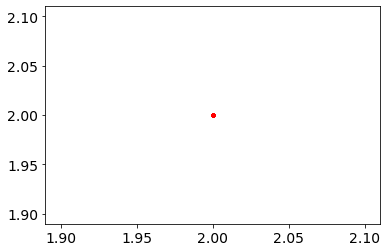

In [919]:
plt.plot((((np.asarray(slit22(4)))*np.cos(slitphase(4))))[520:600]+((strip(4))*np.cos(stripphase(4)))[520:600],((np.asarray(slit22(4)))*np.sin(slitphase(4)))[520:600]+((strip(4))*np.sin(stripphase(4)))[520:600],"r.")

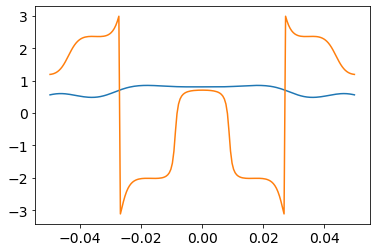

In [884]:
plt.plot(yn_measure[400:600],(slitphase(1))[400:600])
#plt.plot(yn_measure,slit2(1))
plt.plot(yn_measure[400:600],(stripphase(1))[400:600])


In [ ]:
dv=0.1*np.sqrt((2*(0.71+0.3))/(lambda_*z*z2))
dv

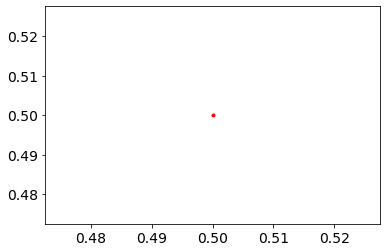

In [677]:
plt.plot(np.sqrt(2)*np.cos(np.pi/4)-0.5,np.sqrt(2)*np.sin(np.pi/4)-0.5,"r.")

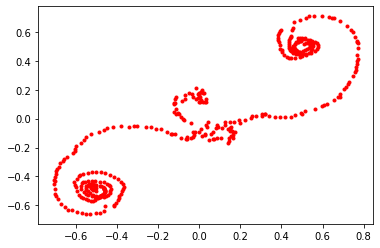

In [618]:
plt.plot(-(((np.asarray(slit2amplitudes)/5)*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[250:450]-0.5,-((np.asarray(slit2amplitudes)/5)*np.sin(-np.asarray(slit2_phase)+np.pi/4))[250:450]-0.5,"r.")
plt.plot((((np.asarray(slit2amplitudes)/5)*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[50:250]+0.5,((np.asarray(slit2amplitudes)/5)*np.sin(-np.asarray(slit2_phase)+np.pi/4))[50:250]+0.5,"r.")


In [526]:
plt.plot(-((np.abs(np.asarray(slit2amplitudes)))*np.cos(-np.asarray(slit2_phase)+np.pi/4)))[250:400]-0.5,-(np.abs(np.asarray(slit2amplitudes)/3.5)*np.sin(-np.asarray(slit2_phase)+np.pi/4))[250:400]-0.5,"r.")

SyntaxError: invalid syntax (<ipython-input-526-53fe43683162>, line 1)

In [527]:
slitamplitudes2=((np.asarray(slit2amplitudes)))
slitphase22=-(np.asarray(slit2_phase))

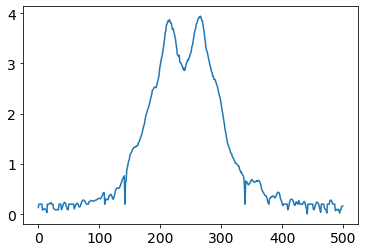

In [746]:
plt.plot(np.abs(slit2amplitudes))

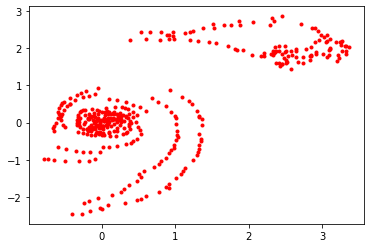

In [528]:
plt.plot((((slitamplitudes2)*np.cos(slitphase22+np.pi/4))[0:400]),((slitamplitudes2*np.sin(slitphase22+np.pi/4))[0:400]),"r.")


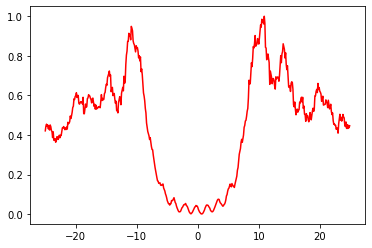

In [197]:
with open('strip1_79_20.pkl', 'rb') as f:
    strip1 = pickle.load(f)


strip1amplitudes=[]
strip1covariance=[]

for i in range(500):
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,3750),strip1["channelB"][i],p0=[1,0.0016,1])
    strip1amplitudes.append(popt[0])
    strip1covariance.append(np.sqrt(pcov[0][0]))
    
plt.plot(np.arange(-25,25,0.1),(np.abs(np.asarray(strip1amplitudes)))**2/np.max((np.abs(np.asarray(strip1amplitudes)))**2),"r-")


In [840]:
#strip_phase=[]
#phase_count=0
#for i in range(500):
    
    #popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),strip1["channelB"][i],p0=[2,40000,-1],bounds=(-3.5,[np.inf,50000,3.5]))
    #strip_phase.append(popt[2])

strip_phase2=[]
phase_count=0
for i in range(500):
    
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),strip1["channelB"][i],p0=[2,40000,0])
    strip_phase2.append(popt[2])

peaks2a, _ = find_peaks((np.asarray(strip_phase2)),height=1,width=2)
    
newstrip_phase2=np.zeros(500)
#new_edgephase2[0:150]=edge_phase2[0:150]

for i in range(0,500):
    if i <498:
        for j in range(len(peaks2a)):
            if i == peaks2a[j]:
                phase_count+=np.pi
                newstrip_phase2[i]=(0)
            else:
                newstrip_phase2[i]=strip_phase2[i]
        #print(phase_count)
     

array([ 13,  54, 104, 180, 185, 203, 239, 279, 289, 323, 396, 447, 489],
      dtype=int64)

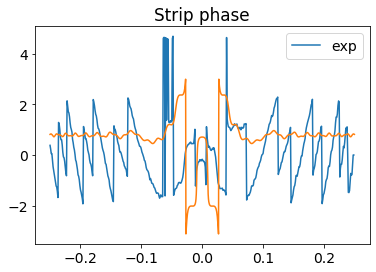

In [1187]:
plt.plot(np.arange(-0.25,0.25,0.001),-newstrip_phase2,label="exp")
#plt.plot(np.arange(-25,25,0.1),(np.abs(np.asarray(strip1amplitudes))),"r-")
plt.plot(yn_measure,(stripphase(1)))
#plt.ylim(-5,5)
peaks2a, _ = find_peaks((np.asarray(strip_phase2)),height=1,width=2)
plt.title("Strip phase")
plt.legend()
peaks2a

In [ ]:
stripphase2=-np.asarray(strip_phase)+np.pi/4

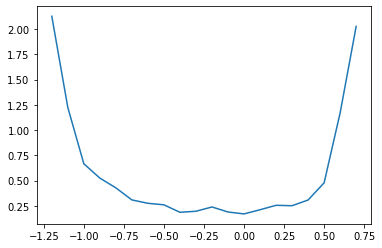

In [449]:
plt.plot(np.arange(-25,25,0.1)[238:258],np.asarray(strip_phase)[238:258])

In [426]:
slit_phase=[]
phase_count=0
for i in range(500):
    
    popt, pcov= scipy.optimize.curve_fit(sinsignalfunc,np.arange(0,1.5E-4,4E-8),slit1["channelB"][i],p0=[2,40000,2])
    slit_phase.append(popt[2])

peaks3, _ = find_peaks((np.asarray(slit_phase)),height=2.5)
    
new_slit_phase=np.zeros(500)
new_slit_phase[0:150]=slit_phase[0:150]

for i in range(150,500):
    if i <499:
        for j in range(len(peaks3)):
            if i == peaks3[j]:
                phase_count+=np.pi
            new_slit_phase[i+1]=(slit_phase[i]-phase_count)
     

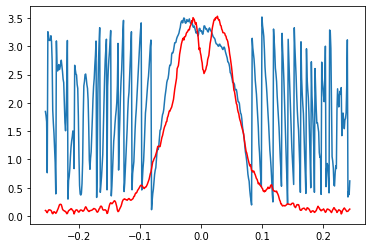

In [504]:
plt.plot(np.arange(-0.255,0.245,0.001),np.asarray(np.asarray(slit_phase)))
plt.plot(np.arange(-0.255,0.245,0.001),(np.abs(np.asarray(slit1amplitudes))),"r-")


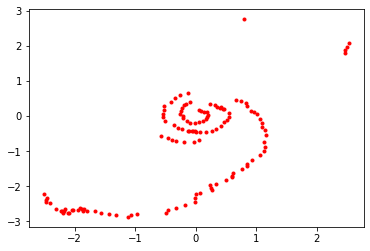

In [474]:
plt.plot((((np.asarray(slit1amplitudes))*np.cos(-np.asarray(slit_phase)+np.pi/4)))[270:400],((np.asarray(slit1amplitudes))*np.sin(-np.asarray(slit_phase)+np.pi/4))[270:400],"r.")

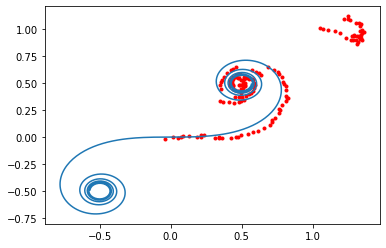

In [482]:
plt.plot((((np.asarray(slit1amplitudes)/3.5)*np.cos(-np.asarray(slit_phase)+np.pi/4)))[100:250]+0.5,((np.asarray(slit1amplitudes)/3.5)*np.sin(-np.asarray(slit_phase)+np.pi/4))[100:250]+0.5,"r.")
plt.plot(C3,S3)